In [ ]:
# 1 Download ADCS orbital simulation torque output data for 100 orbits
#
# Data was converted to .csv from original .mat file
# https://stackoverflow.com/questions/31330883/converting-mat-file-to-csv-file-results-in-an-error
#
# Matlab script used to convert to CSV:
# 
# >> FileData = load('100torq.mat')
# >> T = struct2table(FileData)
# >> writetable(T,'100torq.csv','Delimiter',',')
#
# data units:
# torque in Nm
# time in seconds

!wget https://github.com/t-christison/ADCS_simulations/raw/master/100torq.zip

!apt install unzip
!unzip 100torq.zip

--2021-02-12 23:35:51--  https://github.com/t-christison/ADCS_simulations/raw/master/100torq.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/t-christison/ADCS_simulations/master/100torq.zip [following]
--2021-02-12 23:35:51--  https://raw.githubusercontent.com/t-christison/ADCS_simulations/master/100torq.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87578243 (84M) [application/zip]
Saving to: ‘100torq.zip’

100torq.zip         100%[===================>]  83.52M   107MB/s    in 0.8s    

2021-02-12 23:35:52 (107 MB/s) - ‘100torq.zip’ saved [87578243/87578243]

Reading package lists... D

In [ ]:
#2 create pandas object for data anaylsis
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

import pandas as pd

# import csv into pandas dataframe
df = pd.read_csv(r'100torq.csv')

df.columns = ['time (s)', 'rw_x (Nm)', 'rw_y (Nm)', 'rw_z (Nm)']

print(df)

              time (s)     rw_x (Nm)     rw_y (Nm)     rw_z (Nm)
0             0.000000  2.894764e-10 -2.412754e-10 -1.102968e-10
1             0.004070  2.826515e-10 -2.355911e-10 -1.077137e-10
2             0.024421  2.826576e-10 -2.355878e-10 -1.077136e-10
3             0.100000  2.826802e-10 -2.355755e-10 -1.077133e-10
4             0.477894  2.827933e-10 -2.355138e-10 -1.077116e-10
...                ...           ...           ...           ...
1676959  556195.546367 -3.201112e-06 -2.116795e-06 -9.314865e-07
1676960  556196.000000 -3.198498e-06 -2.115062e-06 -9.306529e-07
1676961  556196.100000 -3.545861e-06 -2.303636e-06 -4.434074e-07
1676962  556196.600000 -3.543917e-06 -2.302368e-06 -4.430715e-07
1676963  556196.798547 -3.541679e-06 -2.300912e-06 -4.427555e-07

[1676964 rows x 4 columns]


In [ ]:
#3 Set torque constant

## Motor was Faulhaber 1509T006B-X4192
## datasheet url: https://www.faulhaber.com/fileadmin/Import/Media/EN_1509_B_DFF.pdf
#torque_constant = 3.56 / 1000 # 3.56 mNm/A = 0.00356 Nm/A


# Motor is now Maxon 351098 
# https://www.maxongroup.com/medias/sys_master/root/8841185132574/EN-277.pdf
torque_constant = 5.88 / 1000 # 3.56 mNm/A = 0.00356 Nm/A

In [ ]:
#4 Set number of orbits in data

num_orbits = 100 # number of orbits simulated

In [ ]:
#5 Find max torques outputted in simulations for each reaction wheel
torq_maximums = df.max() # returns pandas series
torq_maximums

time (s)     556196.798547
rw_x (Nm)         0.000026
rw_y (Nm)         0.000025
rw_z (Nm)         0.000025
dtype: float64

In [ ]:
#5 Orbital simulation duration in seconds
time_100_orbits = torq_maximums['time (s)']
print(time_100_orbits)

556196.798546746


In [ ]:
#6 Motor supply voltage
supply_voltage = 5 # V

In [ ]:
#7.1 Maxon Motor

# Calculate maximum current
rwx_max_current = torq_maximums['rw_x (Nm)']/torque_constant
print("Reaction Wheel X-axis maximum current is ", rwx_max_current, "A")

rwy_max_current = torq_maximums['rw_y (Nm)']/torque_constant
print("Reaction Wheel Y-axis maximum current is ", rwy_max_current, "A")

rwz_max_current = torq_maximums['rw_z (Nm)']/torque_constant
print("Reaction Wheel Z-axis maximum current is ", rwz_max_current, "A")

print('for supply voltage:', supply_voltage, "V")

# Calculate max power per motor
print("Reaction Wheel X-axis maximum power is ", supply_voltage*rwx_max_current, "W")
print("Reaction Wheel Y-axis maximum power is ", supply_voltage*rwy_max_current, "W")
print("Reaction Wheel Z-axis maximum power is ", supply_voltage*rwz_max_current, "W")

Reaction Wheel X-axis maximum current is  0.00439933913387631 A
Reaction Wheel Y-axis maximum current is  0.00428795333160665 A
Reaction Wheel Z-axis maximum current is  0.0042251551869181975 A
for supply voltage: 5 V
Reaction Wheel X-axis maximum power is  0.021996695669381547 W
Reaction Wheel Y-axis maximum power is  0.02143976665803325 W
Reaction Wheel Z-axis maximum power is  0.021125775934590987 W


#7.2 Faulhaber output
```
Reaction Wheel X-axis maximum current is  0.007266324187413679 A  
Reaction Wheel Y-axis maximum current is  0.0070823498847885115 A  
Reaction Wheel Z-axis maximum current is  0.0069786271064828645 A  
for supply voltage: 5 V   
Reaction Wheel X-axis maximum power is  0.0363316209370684 W  
Reaction Wheel Y-axis maximum power is  0.035411749423942554 W  
Reaction Wheel Z-axis maximum power is  0.03489313553241432 W
```



In [ ]:
#8
#Calculate average current comsumption of motors

# to determine average current consumption of motors, need sum of absolute values of torques for each wheel

rw_x_T_total = df['rw_x (Nm)'].abs().sum()
average_current_x = (rw_x_T_total/time_100_orbits)/torque_constant
print("Reaction Wheel X-axis average current:", average_current_x, "A")

rw_y_T_total = df['rw_y (Nm)'].abs().sum()
average_current_y = (rw_y_T_total/time_100_orbits)/torque_constant
print("Reaction Wheel Y-axis average current:", average_current_y, "A")

rw_z_T_total = df['rw_z (Nm)'].abs().sum()
average_current_z = (rw_z_T_total/time_100_orbits)/torque_constant
print("Reaction Wheel Z-axis average current:", average_current_z, "A")


Reaction Wheel X-axis average current: 0.0005453608817540949 A
Reaction Wheel Y-axis average current: 0.000594942829434242 A
Reaction Wheel Z-axis average current: 0.0005442149575174454 A


In [ ]:
#9
avg_power_x = supply_voltage*average_current_x
avg_power_y = supply_voltage*average_current_y
avg_power_z = supply_voltage*average_current_z

print("Reaction Wheel X-axis average power:", avg_power_x, "W")
print("Reaction Wheel Y-axis average power:", avg_power_y, "W")
print("Reaction Wheel Z-axis average power:", avg_power_z, "W")


Reaction Wheel X-axis average power: 0.0027268044087704747 W
Reaction Wheel Y-axis average power: 0.00297471414717121 W
Reaction Wheel Z-axis average power: 0.002721074787587227 W


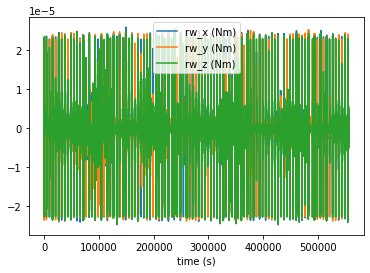

In [ ]:
#10 Plotting torques for 100 orbits
df.plot(x='time (s)')

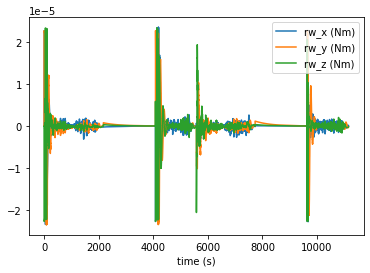

In [ ]:
#11 Plotting torques for ~2 orbits
plot_range = int(1676963/num_orbits)*2

df.iloc[0:plot_range].plot(x='time (s)')

              time (s)     rw_x (Nm)     rw_y (Nm)     rw_z (Nm)
0             0.000000  2.894764e-10 -2.412754e-10 -1.102968e-10
1             0.004070  2.826515e-10 -2.355911e-10 -1.077137e-10
2             0.024421  2.826576e-10 -2.355878e-10 -1.077136e-10
3             0.100000  2.826802e-10 -2.355755e-10 -1.077133e-10
4             0.477894  2.827933e-10 -2.355138e-10 -1.077116e-10
...                ...           ...           ...           ...
1676959  556195.546367 -3.201112e-06 -2.116795e-06 -9.314865e-07
1676960  556196.000000 -3.198498e-06 -2.115062e-06 -9.306529e-07
1676961  556196.100000 -3.545861e-06 -2.303636e-06 -4.434074e-07
1676962  556196.600000 -3.543917e-06 -2.302368e-06 -4.430715e-07
1676963  556196.798547 -3.541679e-06 -2.300912e-06 -4.427555e-07

[1676964 rows x 4 columns]
              time (s)     rw_x (Nm)     rw_y (Nm)     rw_z (Nm)
0             0.000000  2.894764e-10 -2.412754e-10 -1.102968e-10
1             0.004070  2.826515e-10 -2.355911e-10 -1.077137e-

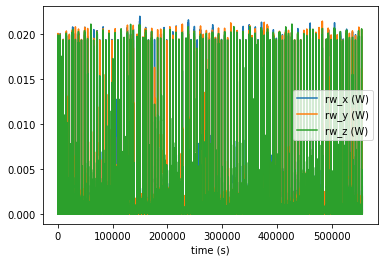

In [ ]:
#12 Plotting power use

# if this cell is giving errors or inconsistent output, rerun cell 2
power_df = df
print(df)
print(power_df)

power_df['rw_x (Nm)'] = df['rw_x (Nm)'].apply(lambda x: abs((x/torque_constant)*supply_voltage))
power_df['rw_y (Nm)'] = df['rw_y (Nm)'].apply(lambda x: abs((x/torque_constant)*supply_voltage))
power_df['rw_z (Nm)'] = df['rw_z (Nm)'].apply(lambda x: abs((x/torque_constant)*supply_voltage))
power_df.columns = ['time (s)', 'rw_x (W)', 'rw_y (W)', 'rw_z (W)']
print(power_df)
power_df.plot(x='time (s)')

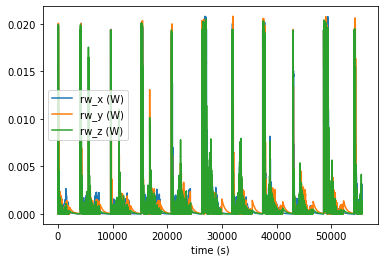

In [ ]:
#13 Plot of power over ~10 orbits
plot_range = int(1676963/num_orbits)*10

power_df.iloc[0:plot_range].plot(x='time (s)')

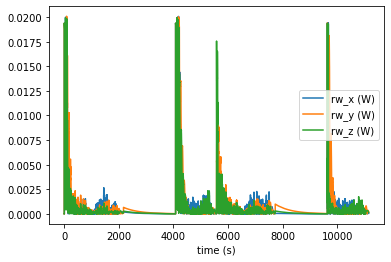

In [ ]:
#12 Plot of power over ~2 orbits
plot_range = int(1676963/num_orbits)*2

power_df.iloc[0:plot_range].plot(x='time (s)')